<a href="https://colab.research.google.com/github/ChristopherJonathan0/Heart-Disease-Analysis-and-Prediction-Using-Logistic-Regression-and-EDA/blob/main/Heart_Disease_Analysis_and_Prediction_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.linear_model as lm
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    roc_curve,
    roc_auc_score
)


In [133]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
df1 = pd.read_csv('/content/drive/MyDrive/Fundamental of Data Engineering/processed.cleveland.data')
df1.describe()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


    'age',        # umur
    'sex',        # jenis kelamin
    'cp',         # tipe nyeri dada
    'trestbps',   # tekanan darah istirahat
    'chol',       # kolesterol
    'fbs',        # gula darah puasa
    'restecg',    # hasil EKG
    'thalach',    # detak jantung maksimum
    'exang',      # nyeri dada akibat olahraga
    'oldpeak',    # depresi ST
    'slope',      # kemiringan segmen ST
    'ca',         # jumlah pembuluh utama
    'thal',       # status thalassemia
    'target'      # diagnosis penyakit jantung

In [135]:
# Ubah nama kolom
df1.columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]


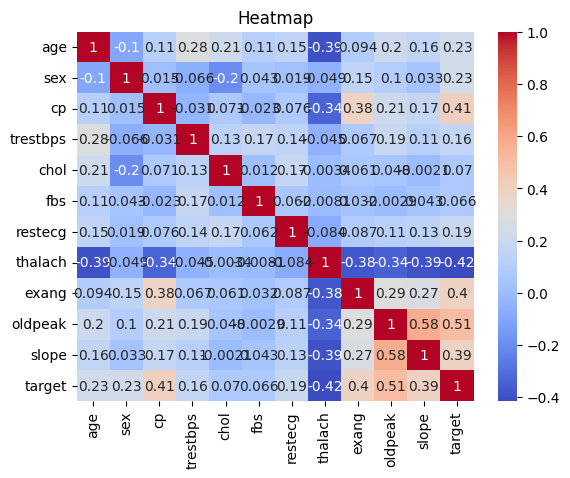

<Figure size 1000x1000 with 0 Axes>

In [136]:
sns.heatmap(df1.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.figure(figsize=(10, 10))
plt.show()


In [137]:
df1.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [138]:
df1['target'].value_counts()

,count
target,
0,163
1,55
2,36
3,35
4,13


<Axes: xlabel='target'>

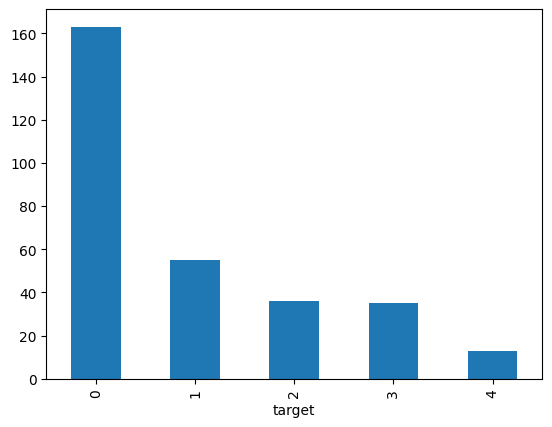

In [139]:
df1['target'] = df1['target'].astype('category', copy=False)
df1['target'].value_counts().plot(kind='bar')

In [140]:
# cek apakah masih ada tanda '?'
(df1 == '?').sum()
df1.replace('?', np.nan, inplace=True)
df1.dropna(inplace=True)

X = df1[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df1['target']
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.3, random_state=42)

In [141]:
model = lm.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=5000,
                   multi_class='multinomial', random_state=42)

In [142]:
print(model.coef_)

[[ 1.90460625e-02 -6.33158801e-01 -2.96164955e-01 -1.24675617e-02
  -3.25648641e-04  5.26368300e-01 -2.90806382e-01  2.52769863e-02
  -7.68349034e-01 -4.90011580e-01 -1.44898487e-01 -1.25542236e+00
  -3.11109535e-01]
 [-2.16250339e-03  2.10111614e-01 -5.29418562e-02  1.27164370e-02
   5.87500452e-03 -3.87213104e-01 -9.38317396e-02 -3.63422902e-03
   8.13294281e-02 -1.83613745e-01 -1.00993260e-01 -3.73543189e-01
  -1.21111896e-01]
 [ 8.56326498e-03  2.95420091e-01  3.12265372e-01  6.70849846e-03
   6.21478738e-03  4.14392494e-01 -2.85992989e-01 -1.62146082e-02
   4.38990969e-02  2.11339021e-01 -4.32801693e-01  1.80639350e-01
   3.54198486e-02]
 [-7.04914059e-02 -1.26455318e-01  3.28457035e-01  1.67793021e-03
  -2.64109120e-03  9.30596972e-01  1.32845263e-01 -2.13016853e-02
  -9.19215554e-03  2.28984495e-01 -2.35180392e-01  7.14898855e-01
   2.52307856e-01]
 [ 4.50445818e-02  2.54082414e-01 -2.91615595e-01 -8.63530397e-03
  -9.12305206e-03 -1.48414466e+00  5.37785848e-01  1.58735363e-02


In [143]:
y_pred = model.predict(X_test)
print(y_pred)

[0 2 0 1 1 0 0 3 0 0 0 4 4 0 2 3 0 0 3 0 0 2 4 1 0 4 0 0 0 4 0 0 0 0 1 0 0
 2 0 4 0 1 1 3 1 0 0 0 0 1 0 0 3 4 0 0 0 3 3 0 3 0 0 3 0 0 1 1 1 2 1 4 4 1
 1 3 4 0 0 0 1 2 2 0 2 1 2 1 4]


<Axes: >

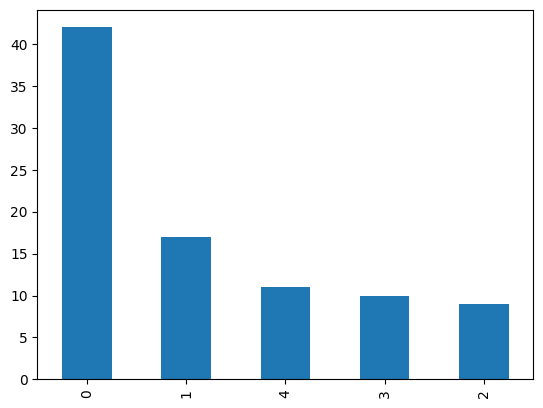

In [144]:
y_pred_series = pd.Series(y_pred)

y_pred_series = y_pred_series.astype('category', copy=False)

y_pred_series.value_counts().plot(kind='bar')

In [145]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
278,58.0,0.0,4.0,130.0,197.0,0.0,0.0,131.0,0.0,0.6,2.0,0.0,3.0
156,58.0,1.0,4.0,125.0,300.0,0.0,2.0,171.0,0.0,0.0,1.0,2.0,7.0
84,44.0,1.0,3.0,140.0,235.0,0.0,2.0,180.0,0.0,0.0,1.0,0.0,3.0
82,68.0,1.0,3.0,180.0,274.0,1.0,2.0,150.0,1.0,1.6,2.0,0.0,7.0
264,42.0,1.0,4.0,136.0,315.0,0.0,0.0,125.0,1.0,1.8,2.0,0.0,6.0


In [146]:
y_test.head(3)

,target
278,0
156,1
84,0


In [153]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nPrecision:\n",precision_score(y_test, y_pred, average=None))
print("\nAUC:\n", met.roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro'))

Confusion Matrix:
 [[38  6  1  0  4]
 [ 4  6  1  1  2]
 [ 0  3  3  3  1]
 [ 0  2  3  4  4]
 [ 0  0  1  2  0]]

Accuracy: 0.5730337078651685

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.84        49
           1       0.35      0.43      0.39        14
           2       0.33      0.30      0.32        10
           3       0.40      0.31      0.35        13
           4       0.00      0.00      0.00         3

    accuracy                           0.57        89
   macro avg       0.40      0.36      0.38        89
weighted avg       0.65      0.57      0.61        89


Precision:
 [0.9047619  0.35294118 0.33333333 0.4        0.        ]

AUC:
 0.7811241474728496


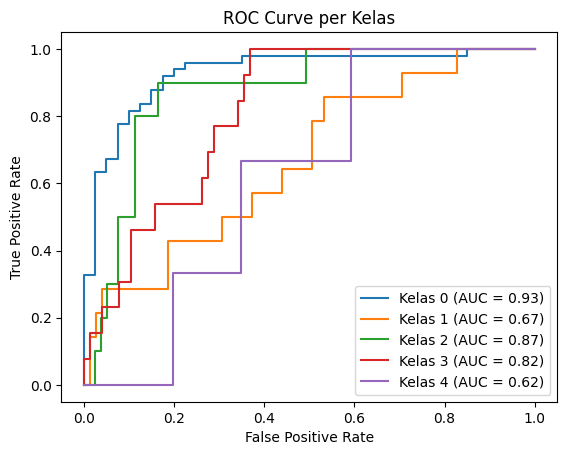

In [149]:
classes = sorted(list(set(y_test)))
y_test_bin = label_binarize(y_test, classes=classes)
y_pred_proba = model.predict_proba(X_test)

# Plot ROC per kelas
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Kelas {classes[i]} (AUC = {auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve per Kelas")
plt.legend(loc="lower right")
plt.show()

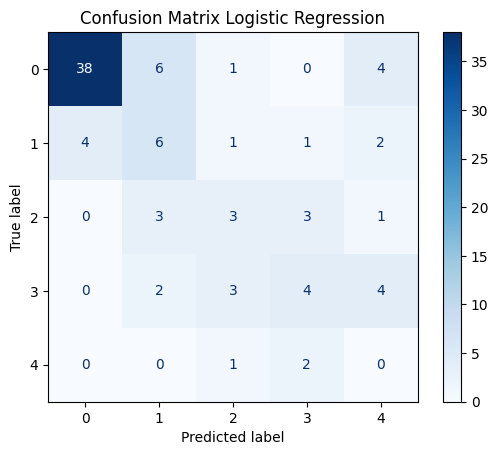

In [150]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1','2', '3','4'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix Logistic Regression')
plt.show()


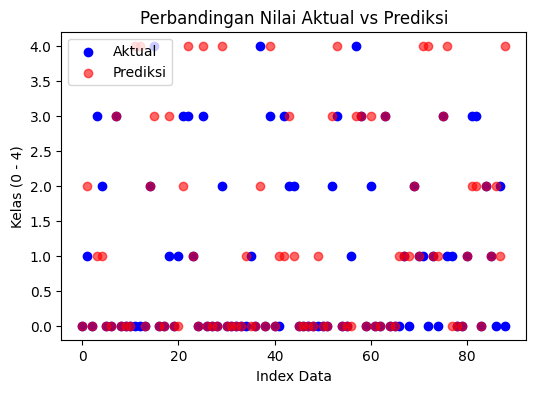

In [151]:
plt.figure(figsize=(6,4))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Aktual')
plt.scatter(range(len(y_pred)), y_pred, color='red', alpha=0.6, label='Prediksi')
plt.title('Perbandingan Nilai Aktual vs Prediksi')
plt.xlabel('Index Data')
plt.ylabel('Kelas (0 - 4)')
plt.legend()
plt.show()


In [152]:
print("Dari hasil di atas, model mampu mengklasifikasikan penyakit jantung dengan akurasi {:.2f}%".format(accuracy_score(y_test, y_pred)*100))


Dari hasil di atas, model mampu mengklasifikasikan penyakit jantung dengan akurasi 57.30%
